In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [49]:
df = pd.read_csv('datasets/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [50]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [51]:
df_new = df
df_new.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [52]:
df_new.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


In [53]:
x = df_new[['Hours Studied', 
                 'Previous Scores', 
                 'Extracurricular Activities',
                 'Sleep Hours', 
                 'Sample Question Papers Practiced']]

y = df_new['Performance Index']

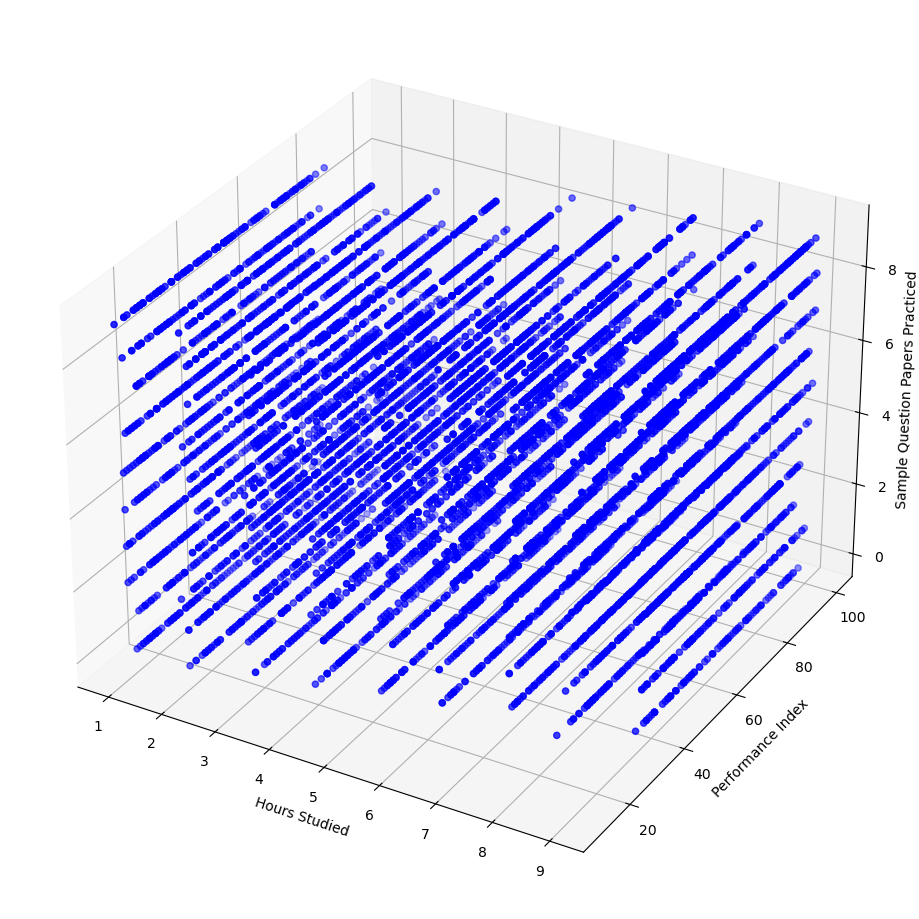

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new['Hours Studied'], 
           df_new['Performance Index'], 
           df_new['Sample Question Papers Practiced'], 
           c='blue', 
           marker='o')

ax.set_xlabel('Hours Studied')
ax.set_ylabel('Performance Index')
ax.set_zlabel('Sample Question Papers Practiced', labelpad=0.1)

plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.show()

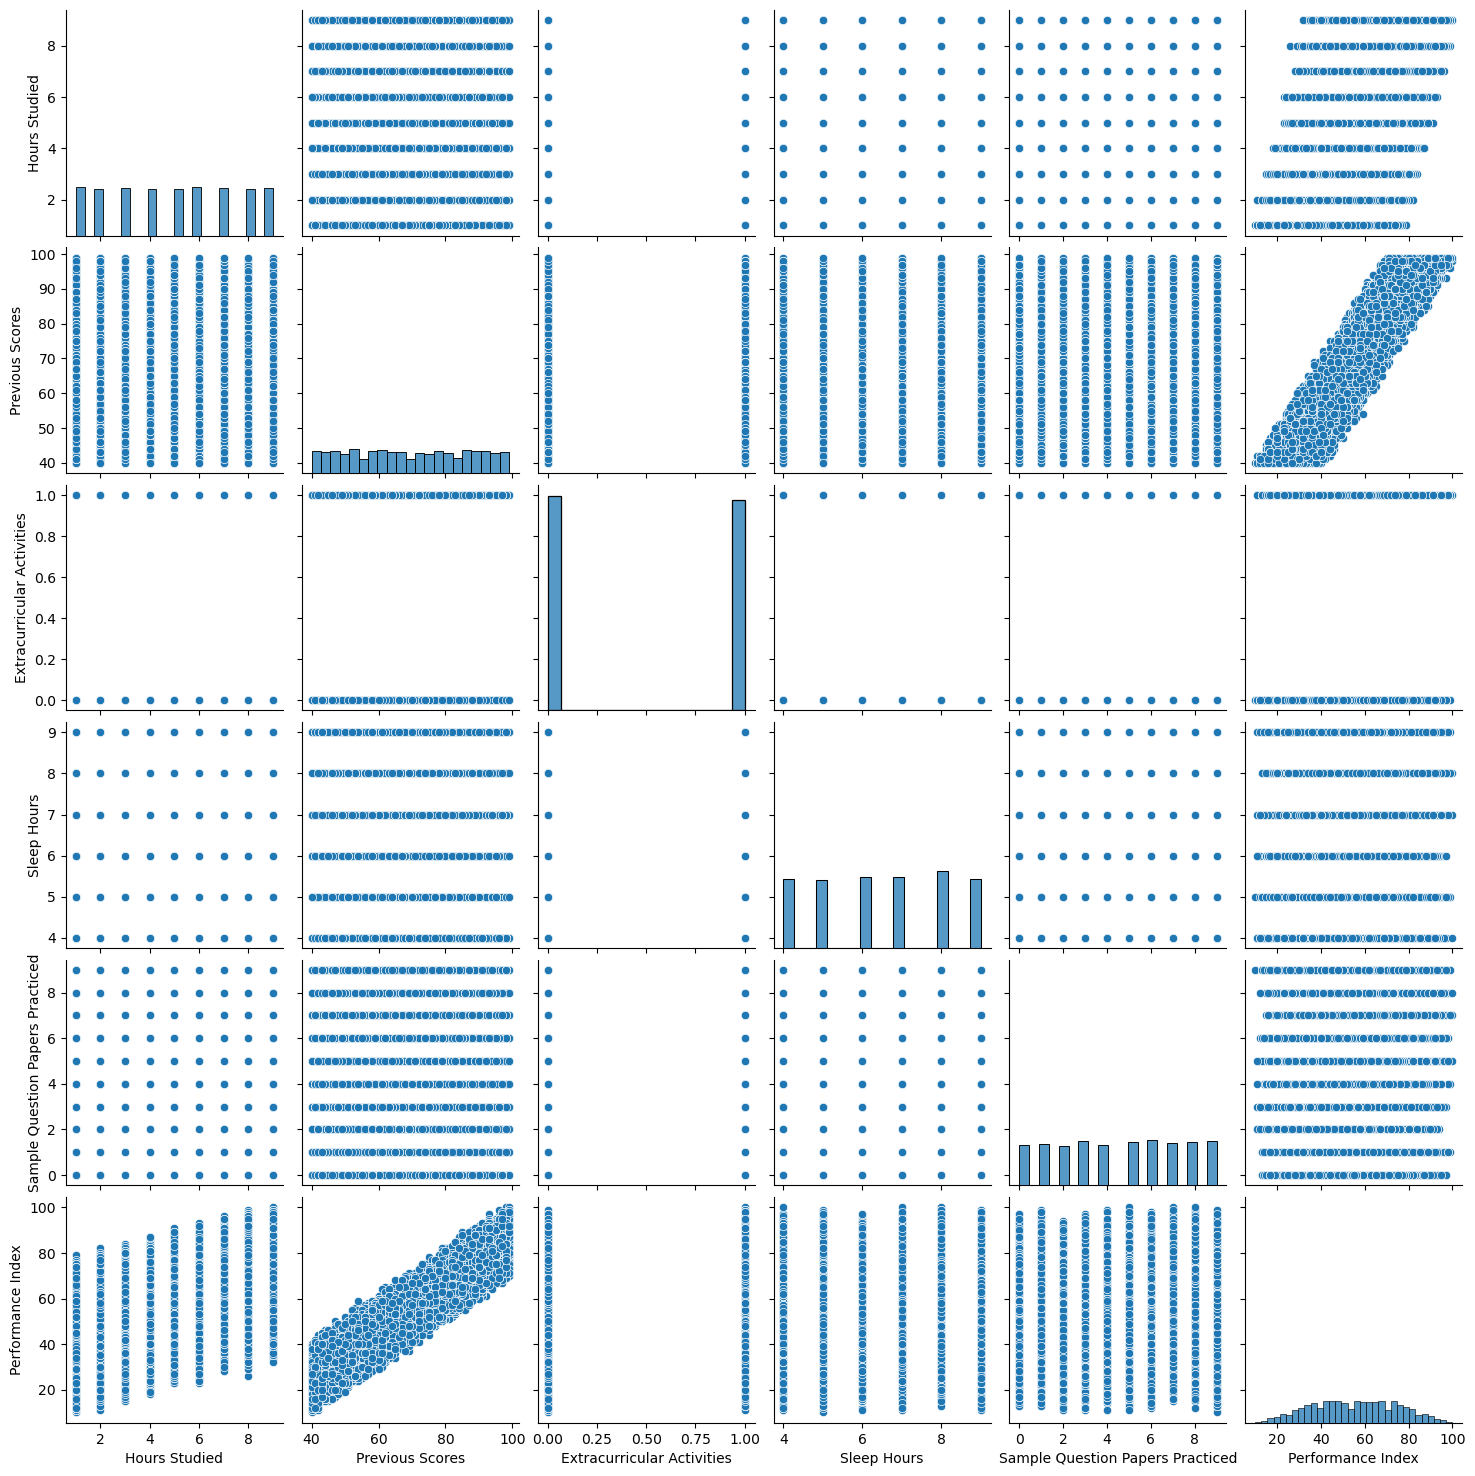

In [55]:
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
sns.pairplot(df_new)
plt.show()

In [56]:
lr_model = LinearRegression()
training = lr_model.fit(x, y)
training

LinearRegression()

In [57]:
coefficient = training.coef_
coefficient

array([2.85298205, 1.01843419, 0.61289758, 0.48055975, 0.19380214])

In [58]:
intercept = training.intercept_
intercept

np.float64(-34.0755880919136)

In [ ]:
yPredicted = training.predict(x)
pd.DataFrame(yPredicted)

,0
0,91.852009
1,63.157787
2,45.052832
3,36.551201
4,67.091339
...,...
9995,21.603410
9996,56.501461
9997,72.998729
9998,94.366183


In [60]:
single_row = x.iloc[[1]]
y_single_predict = training.predict(single_row)
y_single_predict

array([63.15778719])

In [61]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20, random_state=40)
xTrain.shape

(8000, 5)

In [62]:
xTest.shape

(2000, 5)

In [63]:
model_train_eval = lr_model.fit(xTrain, yTrain)
model_train_eval

LinearRegression()

In [64]:
model_test_eval = lr_model.fit(xTest, yTest)
model_test_eval

LinearRegression()

In [65]:
score_train = model_test_eval.score(xTrain, yTrain)
score_train

0.9887277592577643

In [66]:
score_test = model_test_eval.score(xTest, yTest)
score_test

0.9887454687073284

In [67]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y, yPredicted)
MSE

4.151350633946038

In [68]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y, yPredicted)
MAE

1.617482277939707

In [ ]:
result = f' Mean Square Error : {MSE} \n Mean Absolute Error : {MAE} \n R² Training Score : {score_train*100} \n R² Test Score : {score_test*100}'
print(result)

 Mean Square Error : 4.151350633946038 
 Mean Absolute Error : 1.617482277939707 
 R² Training Score : 0.9887277592577643 
 R² Test Score : 0.9887454687073284
